In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import pandas as pd
import eli5


In [2]:
#import datasets
train_df = pd.read_csv("node_features_train.csv")
# shuffle the DataFrame rows
train_df = train_df.sample(frac = 1)
test_df = pd.read_csv("node_features_test.csv")
test_df = test_df.sample(frac = 1)

In [9]:
train_df.groupby("y").mean()

,same_channel,age_diff,same_category,length_diff,views_diff,rate_diff,nb_rate_diff,comments_diff
y,,,,,,,,
0,0.000013,0.028886,0.127489,0.018596,-14.059732,-0.000307,-0.036332,-0.024122
1,0.196092,0.266694,0.621530,11.920625,2962.617657,0.109800,6.300455,4.207372


In [12]:
test_df.groupby("y").mean()

,same_channel,age_diff,same_category,length_diff,views_diff,rate_diff,nb_rate_diff,comments_diff
y,,,,,,,,
0,0.000035,0.054749,0.127435,-12.856303,-146.597472,-0.006010,-0.378100,-0.155144
1,0.196127,0.245299,0.620224,11.219570,2204.554204,0.107236,4.933629,3.300329


In [13]:
y_train = train_df["y"]
x_train = train_df.drop("y", axis=1)
y_test = test_df["y"]
x_test = test_df.drop("y", axis=1)

In [23]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', LogisticRegression(class_weight='balanced', random_state=0))], 
    verbose = True)

In [24]:
pipeline.fit(x_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.3s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   3.9s


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=0))],
         verbose=True)

In [36]:
pipeline["classifier"].coef_.ravel()

array([2.59778949, 0.02073747, 1.04909231, 0.00280507, 0.01312368,
       0.04486099, 0.00433857, 0.04959064])

Text(0.5, 0, 'Logistic Regression Coefficients')

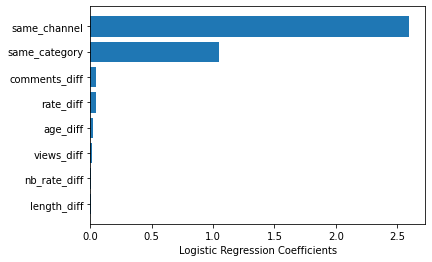

In [38]:
#this works just with RandomForest & other tree based models
sorted_idx = pipeline["classifier"].coef_.ravel().argsort()
plt.barh(x_train.columns[sorted_idx], pipeline["classifier"].coef_.ravel()[sorted_idx])
plt.xlabel("Logistic Regression Coefficients")

In [26]:
print(f1_score(y_test, pipeline.predict(x_test)))

0.7283476790350175


In [28]:
eli5.explain_weights(pipeline['classifier'], feature_names=list(x_train.columns))

Weight?,Feature
+2.598,same_channel
+1.049,same_category
+0.763,<BIAS>
+0.050,comments_diff
+0.045,rate_diff
+0.021,age_diff
+0.013,views_diff
+0.004,nb_rate_diff
+0.003,length_diff
